In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [3]:
# Build the Sequential feedforward neural network model
model = Sequential()
model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(units = 16, activation = 'relu'))
model.add(Dense(units = 16, activation = 'relu'))
model.add(Dense(units = 10, activation = 'softmax'))


In [4]:
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                12560     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [6]:
# Build the Sequential convolutional neural network model
model = Sequential([
    Conv2D(filters = 16, kernel_size = (3, 3), padding = 'SAME', strides = 2, 
               activation = 'relu', input_shape = (28, 28, 1)), 
    MaxPooling2D(pool_size = (3, 3)), 
    Flatten(),
    Dense(units = 10, activation = 'softmax')
])


In [7]:
# Print the model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 2,730
Trainable params: 2,730
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [8]:
# Define the model optimizer, loss function and metrics
opt = tf.keras.optimizers.Adam(learning_rate = 0.005)
loss = tf.keras.losses.SparseCategoricalCrossentropy()
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()

model.compile(optimizer = opt, 
             loss = loss, 
             metrics = [acc, mae])


In [9]:
# Print the resulting model attributes
print(model.optimizer)
print(model.loss)
print(model.metrics)


[<tensorflow.python.keras.metrics.SparseCategoricalAccuracy object at 0x7f3c3c50db00>, <tensorflow.python.keras.metrics.MeanAbsoluteError object at 0x7f3c3c50d898>]


***
<a id="coding_tutorial_4"></a>
## The fit method

In [10]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [11]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [12]:
# Print the shape of the training data
train_images.shape


(60000, 28, 28)

In [13]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [14]:
# Rescale the image values so that they lie in between 0 and 1.
train_images = train_images/255.
test_images = test_images/255.


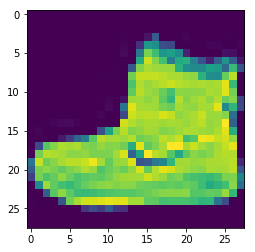

Label:  Ankle boot


In [15]:
# Display one of the images
i = 0
img = train_images[i, :, :]
plt.imshow(img)
plt.show()
print('Label: ', labels[train_labels[i]])


#### Fit the model

In [16]:
# Fit the model
history = model.fit(train_images[..., np.newaxis], train_labels, epochs = 10, batch_size = 256)


Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 19s 319us/sample - loss: 0.7897 - sparse_categorical_accuracy: 0.7228 - mean_absolute_error: 4.4200
Epoch 2/10
60000/60000 [==============================] - 18s 293us/sample - loss: 0.4845 - sparse_categorical_accuracy: 0.8278 - mean_absolute_error: 4.4200
Epoch 3/10
60000/60000 [==============================] - 18s 298us/sample - loss: 0.4369 - sparse_categorical_accuracy: 0.8455 - mean_absolute_error: 4.4200
Epoch 4/10
60000/60000 [==============================] - 18s 300us/sample - loss: 0.4159 - sparse_categorical_accuracy: 0.8516 - mean_absolute_error: 4.4200
Epoch 5/10
60000/60000 [==============================] - 18s 302us/sample - loss: 0.4037 - sparse_categorical_accuracy: 0.8555 - mean_absolute_error: 4.4200
Epoch 6/10
60000/60000 [==============================] - 18s 305us/sample - loss: 0.3949 - sparse_categorical_accuracy: 0.8572 - mean_absolute_error: 4.4200
Epoch 7/10
60000/60000 [=====

#### Plot training history

In [17]:
# Load the history into a pandas Dataframe
df = pd.DataFrame(history.history)
df

,loss,sparse_categorical_accuracy,mean_absolute_error
0,0.789680,0.722767,4.420000
1,0.484538,0.827783,4.420001
2,0.436880,0.845500,4.420000
3,0.415931,0.851583,4.420001
4,0.403653,0.855500,4.420001
5,0.394873,0.857217,4.419999
6,0.390850,0.858650,4.420001
7,0.382136,0.862050,4.420000
8,0.378665,0.862717,4.420000
9,0.375889,0.864350,4.420000


[Text(0, 0.5, 'loss'), Text(0.5, 0, 'Epochs')]

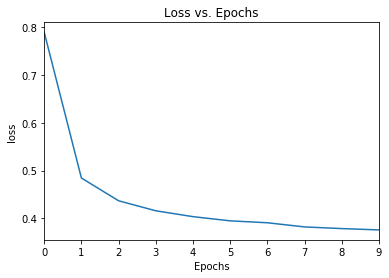

In [18]:
# Make a plot for the loss
loss_plot = df.plot(y = 'loss', title = 'Loss vs. Epochs', legend = False)
loss_plot.set(xlabel = 'Epochs', ylabel = 'loss')

In [27]:
#Make accuracy

In [28]:
# Make a plot for the accuracy


In [29]:
# Make a plot for the additional metric



***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [30]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [33]:
# Evaluate the model
test_loss, accuracy, mea = model.evaluate(test_images[..., np.newaxis], test_labels, verbose = 2)


10000/1 - 2s - loss: 0.3682 - sparse_categorical_accuracy: 0.8383 - mean_absolute_error: 4.4200


#### Make predictions from the model

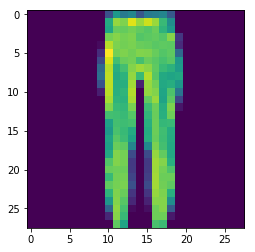

Label:  Trouser


In [34]:
# Choose a random test image
random_idx = np.random.choice(test_images.shape[0])
test_img = test_images[random_idx]
plt.imshow(test_img)
plt.show()
print('Label: ', labels[test_labels[random_idx]])

In [36]:
# Get the model predictions
predictions = model.predict(test_img[np.newaxis, ..., np.newaxis])


In [37]:
print('Model prediction: ', labels[np.argmax(predictions)], ' | Probability = ', 100*np.max(predictions))

Model prediction:  Trouser  | Probability =  99.97922778129578
